<a href="https://colab.research.google.com/github/convenience-tinashe-chibatamoto/Face-Recognition/blob/main/Image_Classification_with_TensorFlow_Face_Recognition_Using_My_Face_as_the_Target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
%cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: google-pasta, six, wheel, gast, protobuf, clang, tensorflow-estimator, numpy, opt-einsum, astunparse, keras-preprocessing, wrapt, tensorboard, termcolor, grpcio, typing-extensions, absl-py, keras, flatbuffers, h5py
Required-by: kapre


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dl libraries
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# specifically for cnn
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

Define the <code>make_train_data</code> function to create a dataset for training the machine learning model.

In [ ]:
def make_train_data(picture_type,DIR):
    i = 0
    for img in os.listdir(DIR):

        if ".py" not in img: #exclude any Python script files in the directory
            i = i + 1

            label = picture_type
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)

            try:
              img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

              X.append(np.array(img))
              Z.append(str(label))
            except:
              break



        if i == 50:
            break

In [ ]:
X=[]
Z=[]
IMG_SIZE=300
IN_PICTURE_DIR='./In Picture'
NOT_IN_PICTURE_DIR='./Not In Picture'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
make_train_data('In Picture', IN_PICTURE_DIR)
print(len(X))

50


In [ ]:
make_train_data('Not In Picture', NOT_IN_PICTURE_DIR)
print(len(X))

70


In [ ]:
#make_train_data('Not In Picture', './pictures')
#print(len(X))

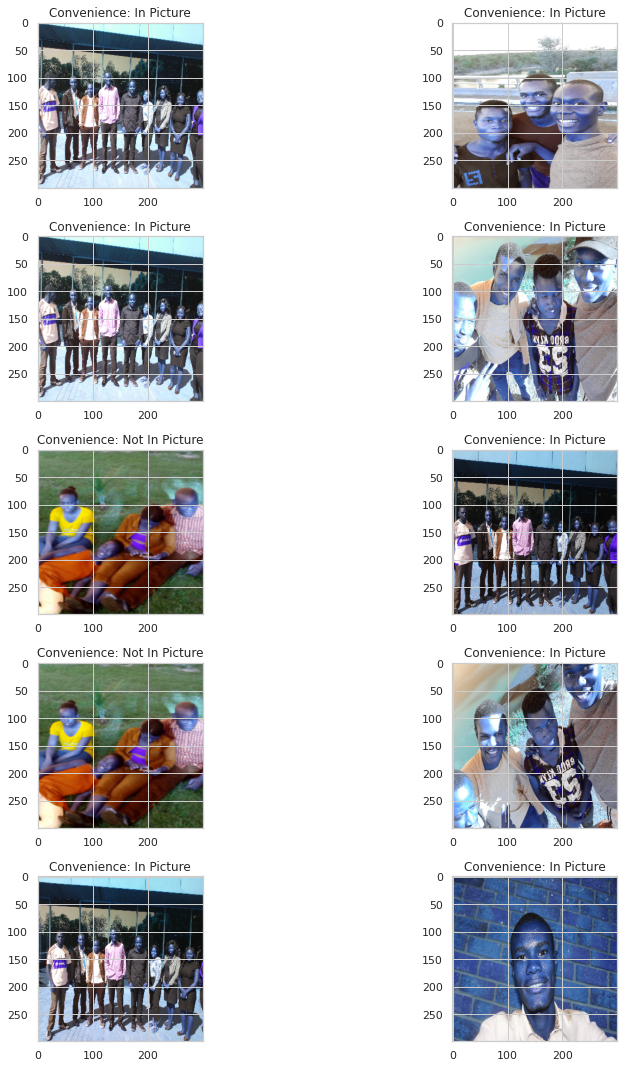

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Convenience: '+Z[l])

plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)

In [ ]:
print(X[0])
print(Y[0])


[[[209 124  57]
  [216 133  62]
  [214 129  59]
  ...
  [214 135  68]
  [209 131  62]
  [211 132  64]]

 [[205 122  59]
  [212 128  60]
  [207 125  57]
  ...
  [208 129  61]
  [218 139  72]
  [223 144  79]]

 [[211 128  60]
  [211 128  61]
  [211 131  61]
  ...
  [192 114  45]
  [213 135  66]
  [211 132  64]]

 ...

 [[109 210 210]
  [ 86 198 186]
  [ 75 183 166]
  ...
  [ 78 116 146]
  [105 136 163]
  [ 69  93 115]]

 [[ 39 158 136]
  [ 18 133 114]
  [ 47 156 142]
  ...
  [ 69  98 127]
  [ 86 112 142]
  [ 79 104 132]]

 [[ 26  73  71]
  [ 57 157 142]
  [ 25 120 109]
  ...
  [ 43  84 109]
  [ 54  87 107]
  [ 96 121 150]]]
0


In [ ]:
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train[0]

array([[[0.29411765, 0.26666667, 0.29411765],
        [0.29019608, 0.2627451 , 0.29019608],
        [0.28235294, 0.28627451, 0.30196078],
        ...,
        [0.36470588, 0.36862745, 0.38431373],
        [0.34509804, 0.34117647, 0.38039216],
        [0.36078431, 0.35686275, 0.39607843]],

       [[0.30196078, 0.29411765, 0.31764706],
        [0.29411765, 0.28627451, 0.30980392],
        [0.2745098 , 0.27843137, 0.29411765],
        ...,
        [0.37254902, 0.37647059, 0.39215686],
        [0.36078431, 0.37647059, 0.39607843],
        [0.35686275, 0.37647059, 0.39215686]],

       [[0.27843137, 0.27843137, 0.29803922],
        [0.2745098 , 0.2745098 , 0.29411765],
        [0.28627451, 0.29019608, 0.29411765],
        ...,
        [0.39215686, 0.4       , 0.4       ],
        [0.34901961, 0.38431373, 0.37647059],
        [0.36078431, 0.39607843, 0.38823529]],

       ...,

       [[0.09803922, 0.11372549, 0.13333333],
        [0.1254902 , 0.14117647, 0.16078431],
        [0.12941176, 0

In [ ]:
#Using a CNN (Convolutional Neural Network).

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
batch_size=32
epochs=20

In [ ]:
x_train.shape

(56, 300, 300, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 96)      55392     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 96)        83040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       1

In [ ]:
print(epochs)

20


In [ ]:
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/20
2/2 [==============================] - 20s 8s/step - loss: 3.1906 - accuracy: 0.6071 - val_loss: 0.3404 - val_accuracy: 0.8571
Epoch 2/20
2/2 [==============================] - 18s 8s/step - loss: 0.6414 - accuracy: 0.6429 - val_loss: 0.7226 - val_accuracy: 0.1429
Epoch 3/20
2/2 [==============================] - 18s 8s/step - loss: 0.7543 - accuracy: 0.4286 - val_loss: 0.5600 - val_accuracy: 0.8571
Epoch 4/20
2/2 [==============================] - 18s 8s/step - loss: 0.6330 - accuracy: 0.6786 - val_loss: 0.5047 - val_accuracy: 0.8571
Epoch 5/20
2/2 [==============================] - 18s 8s/step - loss: 0.6245 - accuracy: 0.6786 - val_loss: 0.4078 - val_accuracy: 0.8571
Epoch 6/20
2/2 [==============================] - 17s 8s/step - loss: 0.6086 - accuracy: 0.6786 - val_loss: 0.4266 - val_accuracy: 0.8571
Epoch 7/20
2/2 [==============================] - 17s 8s/step - loss: 0.5871 - accuracy: 0.6786 - val_loss: 0.4214 - val_accuracy: 0.8571
Epoch 8/20
2/2 [==================

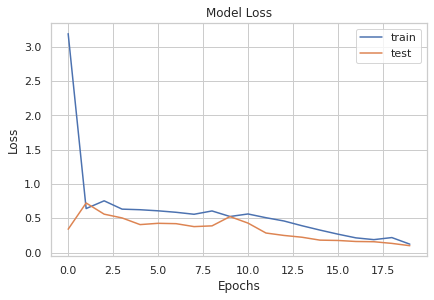

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

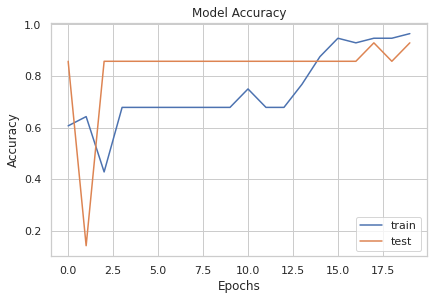

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

pred

array([[8.1601538e-06],
       [6.0694776e-07],
       [1.3560057e-03],
       [8.4447962e-08],
       [5.0696301e-01],
       [1.8974453e-02],
       [7.2535872e-04],
       [1.4508367e-03],
       [2.2870302e-04],
       [2.0081699e-03],
       [5.9404579e-07],
       [2.6844595e-09],
       [4.9622208e-01],
       [2.1845102e-04]], dtype=float32)

In [ ]:
pred[5]

array([0.01897445], dtype=float32)

In [ ]:
pred_digits[1]

0

In [ ]:
def predict_with_class(image_number):
  if pred_digits[image_number] == 0:
    print("Not In Picture")
  elif pred_digits[image_number] == 1:
    print("In Picture")
  else:
    print("In Picture")

In [ ]:
predict_with_class(13)

Not In Picture
